# Natural Language Processing

## Step 1 : Analysing The Dataset

In [42]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#working with stopwords 
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
ps = PorterStemmer()
%matplotlib inline
#we can find not useful so not including in stopwords
stopwordslist = stopwords.words('english')
stopwordslist.remove("not")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\a\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
#reading the datset
df = pd.read_csv("F:\Machine Learning\Machine Learning A-Z New\Python\\spam.csv", encoding = "ISO-8859-1")

In [44]:
#cheching the data shape
print("Total Number of rows and columns in the dataset = ",df.shape)
#cheching dataset 
print("\n\n",df.head(10))

Total Number of rows and columns in the dataset =  (5572, 5)


      v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
5  spam  FreeMsg Hey there darling it's been 3 week's n...        NaN   
6   ham  Even my brother is not like to speak with me. ...        NaN   
7   ham  As per your request 'Melle Melle (Oru Minnamin...        NaN   
8  spam  WINNER!! As a valued network customer you have...        NaN   
9  spam  Had your mobile 11 months or more? U R entitle...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4 

In [45]:
#after checking data droping the columns
print("data set columns ",df.columns)
df = df[["v1","v2"]]

data set columns  Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [46]:
#change column names 
df.columns = ["class","message"]

In [47]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [48]:
#checking info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [49]:
#change class to numeric 
#spam = 0 , ham = 1
df["spam"] = df['class'].apply(lambda x:1 if x == 'ham' else 0)

In [50]:
print(df.head())

  class                                            message  spam
0   ham  Go until jurong point, crazy.. Available only ...     1
1   ham                      Ok lar... Joking wif u oni...     1
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     0
3   ham  U dun say so early hor... U c already then say...     1
4   ham  Nah I don't think he goes to usf, he lives aro...     1


In [51]:
df = df.drop(["class"],axis='columns')

In [52]:
#now checking dataset
df

,message,spam
0,"Go until jurong point, crazy.. Available only ...",1
1,Ok lar... Joking wif u oni...,1
2,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,U dun say so early hor... U c already then say...,1
4,"Nah I don't think he goes to usf, he lives aro...",1
5,FreeMsg Hey there darling it's been 3 week's n...,0
6,Even my brother is not like to speak with me. ...,1
7,As per your request 'Melle Melle (Oru Minnamin...,1
8,WINNER!! As a valued network customer you have...,0
9,Had your mobile 11 months or more? U R entitle...,0


In [53]:
#importing regular expression library
import re
#Creating a function for preprocessing
def preprocess(x) : 
     #Replacing the text
        x.replace("′", "'").replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                                   .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                                   .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                                   .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                                   .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")
    #Convert text between a-z A-Z and numbers 1-9
        x = re.sub("[^a-zA-Z1-9]"," ",x)
    #Convert text into lower case
        x = x.lower()
   
        return x
df["message"] = df["message"].fillna("").apply(preprocess)

# Making corpus of Data

# Check Data balance

In [54]:
#message count of spam label
g = df.groupby("spam")
g.count()

,message
spam,
0,747
1,4825


# Feature Extraction

In [55]:
#adding feature of question length
def addquestion_length(x):
    x = x.replace("     "," ").replace("    "," ").replace("   "," ").replace("  "," ")
    return len(x)  

In [56]:
df["ques_length"] = df["message"].apply(addquestion_length)

In [57]:
df.head()

,message,spam,ques_length
0,go until jurong point crazy available only ...,1,103
1,ok lar joking wif u oni,1,24
2,free entry in 2 a wkly comp to win fa cup fina...,0,151
3,u dun say so early hor u c already then say,1,44
4,nah i don t think he goes to usf he lives aro...,1,60


C:\Users\a\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\a\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


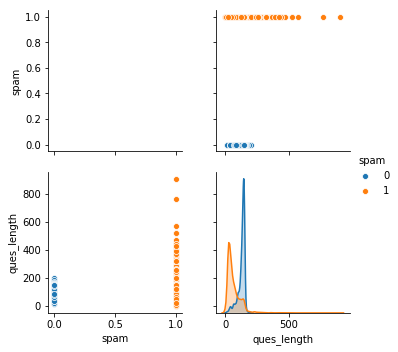

In [58]:
#Data visualization will help to determine our feature
sns.pairplot(df,hue="spam")

In [59]:
newdf = df[df["ques_length"]>200]
newdf["predict"] = 1

C:\Users\a\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


- using our analysis we can generate a rule
- if the length of the message is greater than 200 then we will predict as 1

In [159]:
#function to create corpus 
#corpus is collection of large textual data
corpus = []  #empty list
def makecorpus(x):
    x = x.split()
    x = [ps.stem(word) for word in x if not word in set(stopwordslist)]
    x = ' '.join(x)
    corpus.append(x)

In [160]:
#We are only choosing questions which has less than 200 length
df2 = df[df["ques_length"]<200]

In [161]:
#Considering only 3000 rows as sample data
df2.columns = df2.columns.str.strip()
df2 = df2.loc[:3000,:]

In [162]:
#making corpus from data
for ind in df2.index:
     x = df2['message'][ind]
     makecorpus(x)

In [163]:
#Giving tf-idf score 
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
vectors = vectorizer.fit_transform(corpus)

In [164]:
feature_names = vectorizer.get_feature_names()
(feature_names)

['11',
 '11mth',
 '12',
 '121',
 '1216',
 '123',
 '12hr',
 '1327',
 '14',
 '1417',
 '145',
 '15',
 '16',
 '18',
 '1st',
 '1x15',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '25p',
 '27',
 '28',
 '2day',
 '2go',
 '2land',
 '2nd',
 '2nite',
 '2optout',
 '31',
 '324',
 '35',
 '365',
 '382',
 '3d',
 '3g',
 '3rd',
 '434',
 '44',
 '488',
 '4info',
 '4mth',
 '4t',
 '4th',
 '4txt',
 '4u',
 '4w45wq',
 '515',
 '53',
 '542',
 '555',
 '56242159',
 '578',
 '58',
 '5k',
 '5min',
 '5th',
 '5wb',
 '5we',
 '61',
 '612',
 '6161',
 '617',
 '6179',
 '62',
 '62117',
 '625',
 '6345813',
 '64',
 '65',
 '65174',
 '66',
 '66362231',
 '66612661',
 '69',
 '69698',
 '69888',
 '6hr',
 '6month',
 '6pm',
 '6th',
 '7123456789',
 '71512433',
 '7165',
 '72',
 '725',
 '73',
 '75',
 '75over18',
 '77',
 '7742676969',
 '78',
 '782123',
 '786',
 '7ish',
 '7pm',
 '7th',
 '7xxxxxxxxx',
 '81',
 '81151',
 '813',
 '81618',
 '82',
 '82242',
 '82277',
 '82468',
 '83222',
 '83355',
 '836',
 '8394',
 '84',
 '84128',
 '845',
 '84528

In [165]:
#making dataframe
dense = vectors.todense()
denselist = dense.tolist()
df3 = pd.DataFrame(denselist, columns=feature_names)

In [166]:
df3.head()

,11,11mth,12,121,1216,123,12hr,1327,14,1417,...,yet,yiju,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
6,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
7,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
8,0.000000,0.0,0.275619,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
9,0.239038,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [167]:
len(df3)

2945

In [168]:
X = df3.iloc[:]
y = df2.loc[:,"spam"]

In [169]:
len(y)

2945

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [171]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [172]:
y_pred = classifier.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 80  12]
 [ 54 443]]


In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.88794567062818341